<a href="https://colab.research.google.com/github/kunjkinger/machine-learning-projects/blob/main/greedy_epsilon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [ ]:
Num_trials = 10000
Eps = 0.1
Bandit_probabilities = [0.2,0.5,0.75] # win rates for the bandates

optimal j:  2
mean estimate: 0.20221606648199453
mean estimate: 0.49907235621521323
mean estimate: 0.7480219780219768
total reward earned: 7149.0
overall win rate: 0.7149
number of times explored: 1000
number of times exploited: 9000
num times selected optimal bandit: 9100
cumulative rewards: [   0.    0.    0. ... 7147. 7148. 7149.]


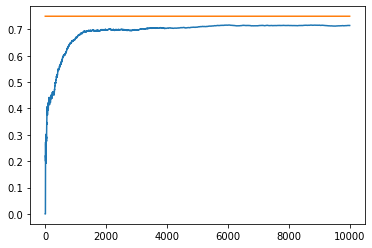

In [45]:
class Bandit:
  def __init__(self,p):
    self.p = p # true win rate
    self.p_estimate = 0. #win estimation
    self.N = 0.

  def pull(self):
      #draw a 1 with probability p
      return np.random.random() < self.p

  def update(self,x):
      self.N += 1.
      self.p_estimate = ((self.N-1)*self.p_estimate + x)/self.N
def experiment():
  bandits = [Bandit(p) for p in Bandit_probabilities]
  rewards = np.zeros(Num_trials)
  num_times_explored = 0
  num_times_exploited = 0
  num_optimal = 0
  optimal_j = np.argmax([b.p for b in bandits])
  print("optimal j: ", optimal_j)

  for i in range(Num_trials):

      #use epsilon greedy to select next bandit
    if np.random.random() < Eps:
      num_times_explored += 1
      j =np.random.randint(len(bandits))
    else:
      num_times_exploited += 1
      j = np.argmax([b.p_estimate for b in bandits])

    if j == optimal_j:
      num_optimal += 1

      #pull the arm for the bandit with the largest sample
    x = bandits[j].pull()
      
  #update the reward
    rewards[i] = x

      #update the distribution for the bandit whose arm just pulled
    bandits[j].update(x)

  for b in bandits:
    print('mean estimate:', b.p_estimate)

  print('total reward earned:', rewards.sum())
  print('overall win rate:', rewards.sum()/ Num_trials)
  print('number of times explored:', num_times_explored)
  print('number of times exploited:', num_times_exploited)
  print('num times selected optimal bandit:', num_optimal)

  #print total reward
#plot the results
  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards/(np.arange(Num_trials) + 1)
  print('cumulative rewards:', cumulative_rewards)
  plt.plot(win_rates)
  plt.plot(np.ones(Num_trials)*np.max(Bandit_probabilities))
  plt.show()

if __name__ == '__main__':
  experiment()


optimal j:  2


AttributeError: ignored

total reward earned: 0.0
overall win rate: 0.0


NameError: ignored